In [578]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import pylab as pl

from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree

import warnings
warnings.filterwarnings('ignore')

from sklearn import set_config
set_config(display="diagram")

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_auc_score,precision_recall_curve, roc_curve,confusion_matrix,accuracy_score, recall_score, precision_score,plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error

<h2 style="color:red;">Business Understanding</h2>

<p>The Business goal is  to come up with the best machine learning classification model to predict if a future client will subscribe a term deposit or not based on several independent variables such as education level, marital status, if has housing loan or not, personal loan or not, etc. The best machine learning classification model is selected by ranking up four different machine learning models: KNeighborsClassifier, Logistic Regression, Support Vector Machine, and Decision Tree by their metrics and other indicators such as the Precision-recal curve, and confusion matrix. The dataset used to train those four models is related to the marketing of bank products over the telephone as mentioned before. The analysis will be done using python & jupyter notebook.</p>

<h2 style="color:red;">Data Understanding</h2>

<p>The original dataset (bank-full.csv) given is in .csv format.It consists of 17 columns and 6316 rows as shown 
below. The target/independent columns is "y" which is categorical (nominal feature), and it stands for:
    has the client subscribed a term deposit?. This variable is imbalance as will be later be seen. There are only 
    two more columns numerical: "age" and "balance", i.e., since the column: "duration" should only be included for
    benchmark purposes and should be discarded if the intention is to have a realistic predictive model.The rest of
    the columns are categorical (nominal). Consequently, most of the dataset provided will be imbalanced before entering
    the modeling phase. None of the columns contain "NaN" values. Duplicates were not observed. It is thought that in 
    order to provide more insight into the aforementioned dataset, a data preparation,i.e, data cleaning process needs
    to be done first.</p>

<h5>Read in the bank-full.csv file.</h5>

In [579]:
df = pd.read_csv('Downloads/bank-full.csv')

In [580]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [558]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


<h5>Investigate the dataset for missing or problematic data.</h5>

In [413]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [414]:
df.loc[df.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


<h2 style="color:red;">Data Preparation</h2>

<h3 style="color:red;">Basic Cleaning</h3>

In [581]:
df.dropna()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


<h5>Feature "unknown" is contained in several diferent variables, therefore, it was renamed as shown below:</h5>

In [582]:
df['job'] = df['job'].replace({'unknown': 'unknown_job'})
df['education'] = df['education'].replace({'unknown': 'unknown_education'})
df['poutcome'] = df['poutcome'].replace({'unknown': 'unknown_poutcome'})
df['contact'] = df['contact'].replace({'unknown': 'unknown_contact'})

<p style="color:red;"> Removing values equal to -1 in the column "pdays"</p>

In [583]:
df=df.query('pdays!=-1')

<h4 style='color:red;font-size:20px'>Visualization of Some Categorical Variables Present</h4>

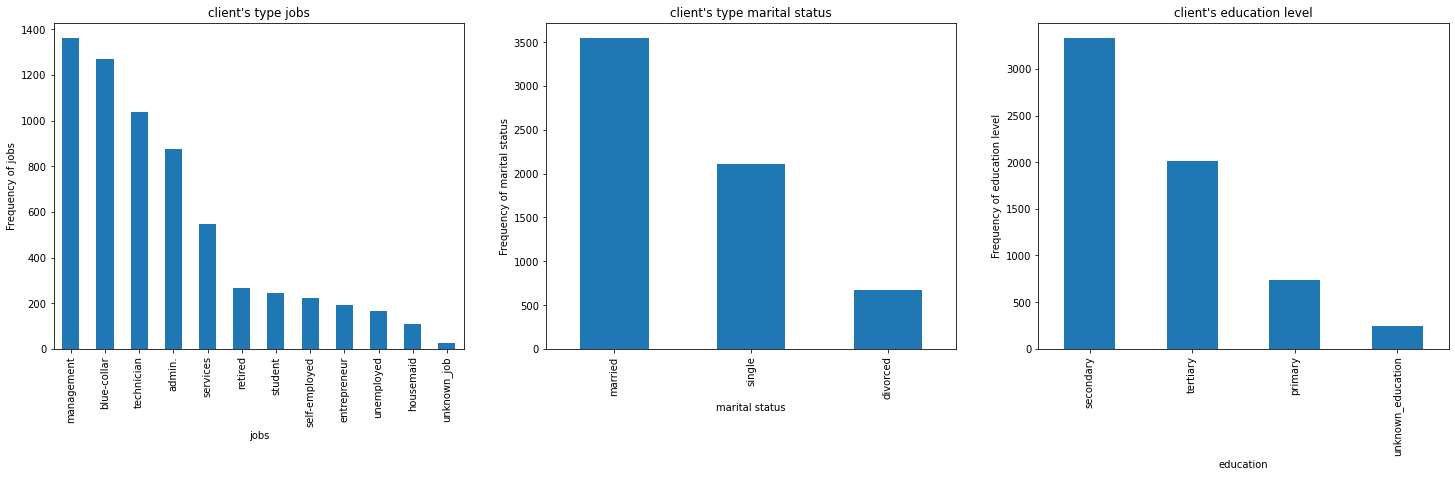

In [446]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df.job.value_counts().plot(kind='bar')
plt.title("client's type jobs")
plt1.set(xlabel = 'jobs', ylabel='Frequency of jobs')

plt.subplot(1,3,2)
plt1 = df.marital.value_counts().plot(kind='bar')
plt.title("client's type marital status")
plt1.set(xlabel = 'marital status', ylabel='Frequency of marital status')

plt.subplot(1,3,3)
plt1 = df.education.value_counts().plot(kind='bar')
plt.title("client's education level")
plt1.set(xlabel = 'education', ylabel='Frequency of education level')


plt.show()

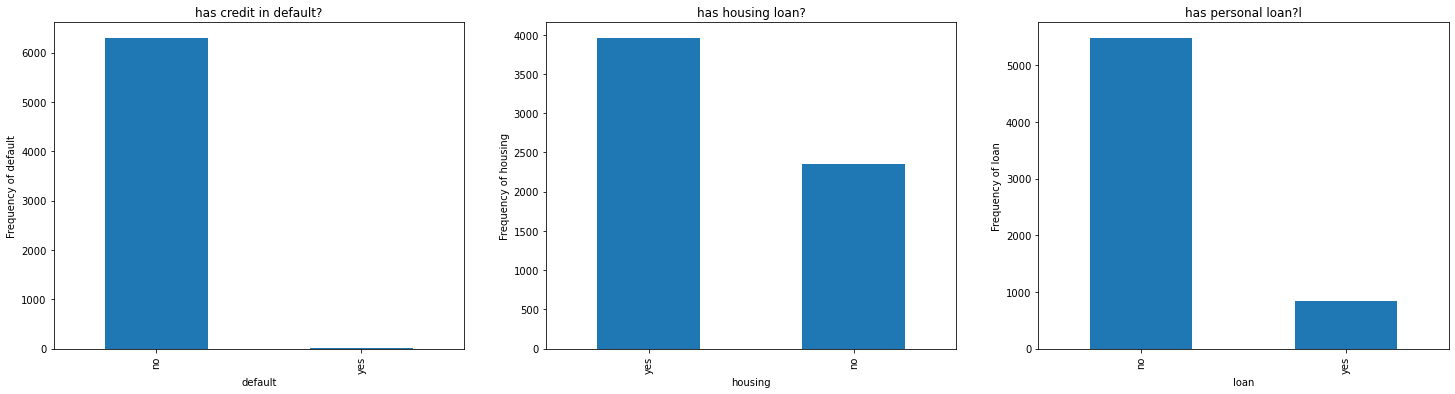

In [448]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df.default.value_counts().plot(kind='bar')
plt.title("has credit in default?")
plt1.set(xlabel = 'default', ylabel='Frequency of default')

plt.subplot(1,3,2)
plt1 = df.housing.value_counts().plot(kind='bar')
plt.title("has housing loan?")
plt1.set(xlabel = 'housing', ylabel='Frequency of housing')

plt.subplot(1,3,3)
plt1 = df.loan.value_counts().plot(kind='bar')
plt.title("has personal loan?l")
plt1.set(xlabel = 'loan', ylabel='Frequency of loan')


plt.show()

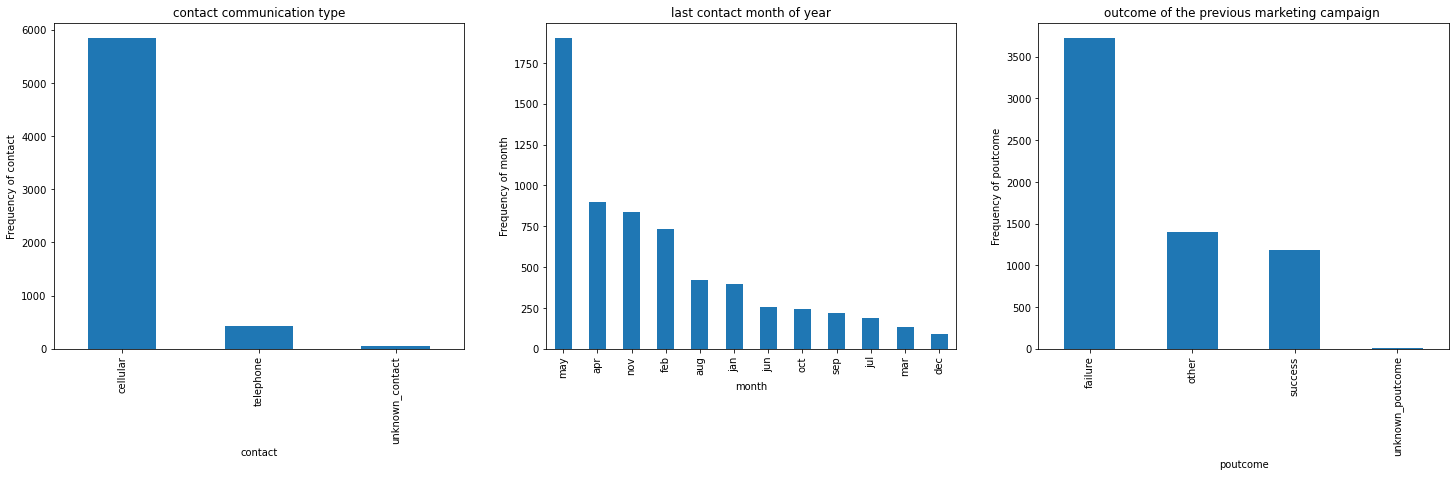

In [449]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df.contact.value_counts().plot(kind='bar')
plt.title("contact communication type")
plt1.set(xlabel = 'contact', ylabel='Frequency of contact')

plt.subplot(1,3,2)
plt1 = df.month.value_counts().plot(kind='bar')
plt.title("last contact month of year")
plt1.set(xlabel = 'month', ylabel='Frequency of month')

plt.subplot(1,3,3)
plt1 = df.poutcome.value_counts().plot(kind='bar')
plt.title("outcome of the previous marketing campaign ")
plt1.set(xlabel = 'poutcome', ylabel='Frequency of poutcome')


plt.show()

<h6 style='color:red;font-size:18px'>Treatment of Numerical Columns with Outliers: 'age','balance','duration','campaign','pdays'</h6>

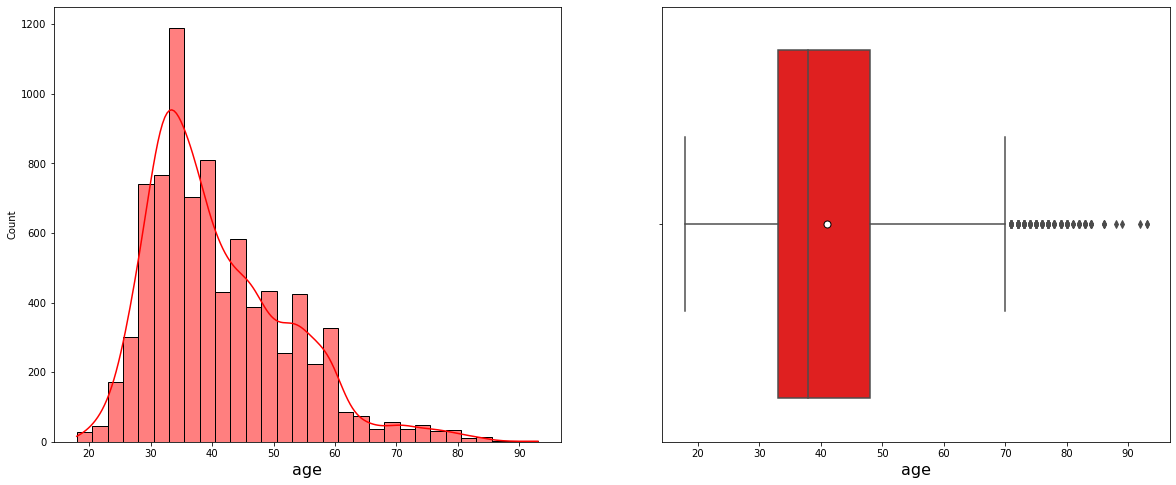

In [367]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
ax=sns.histplot(data=df, x="age",kde=True, color="red",bins=30, ax=axes[0])
ax.set_xlabel('age',fontsize=16)
ax = sns.boxplot(x=df["age"],showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"},ax=axes[1], color="red")
ax.set_xlabel('age',fontsize=16)
plt.show()

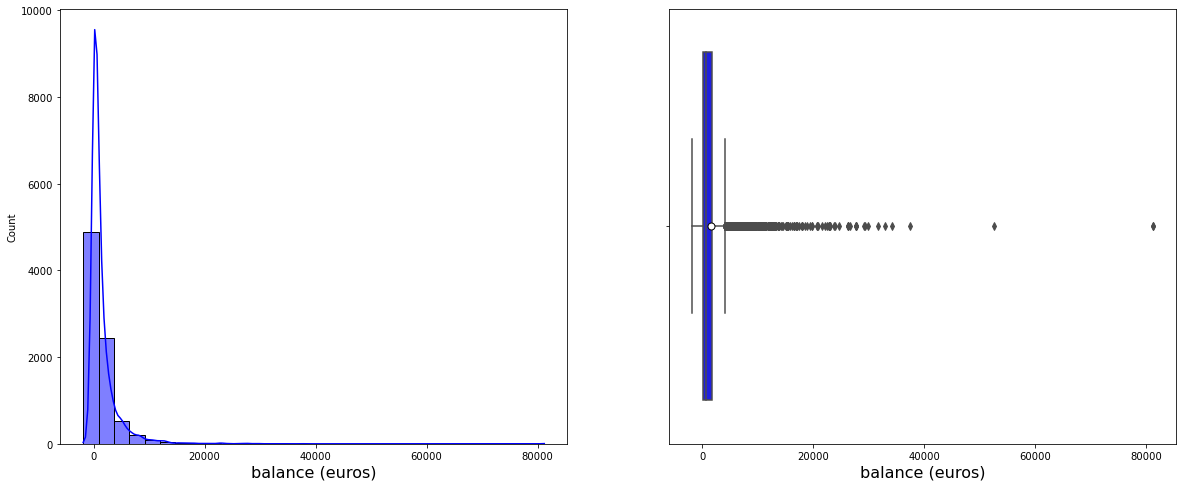

In [368]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
ax=sns.histplot(data=df, x="balance",kde=True, color="blue",bins=30, ax=axes[0])
ax.set_xlabel('balance (euros)',fontsize=16)
ax = sns.boxplot(x=df["balance"],showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"},ax=axes[1], color="blue")
ax.set_xlabel('balance (euros)',fontsize=16)
plt.show()

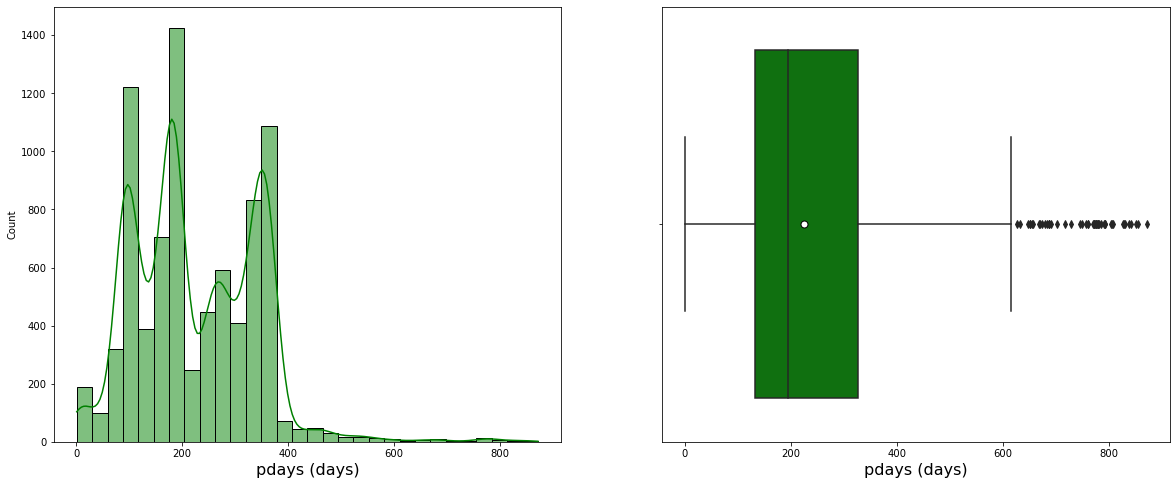

In [369]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
ax=sns.histplot(data=df, x="pdays",kde=True, color="green",bins=30, ax=axes[0])
ax.set_xlabel('pdays (days)',fontsize=16)
ax = sns.boxplot(x=df["pdays"],showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"},ax=axes[1], color="green")
ax.set_xlabel('pdays (days)',fontsize=16)
plt.show()

<h6 style='color:blue;font-size:18px'>Inter quartile range (IQR) method</h6>

<p>One pass was applied to the aforementioned columns in order to remove the outliers. This pass consisted on applying the well known Inter quartile range (IQR) method.It was very effective, i.e., removing the majority of the outliers, and improving the metrics during the modelling phase. As an additional comments, the target column "balance" shows a distribution skewed to the left, i.e, it was felt there was no need  to use its logarithm during modelling phase.</p>

In [562]:
def outlierstreat(data,variable):
    first_quartile=data[variable].quantile(0.25)
    third_quartile=data[variable].quantile(0.75)
    iqr= third_quartile - first_quartile
    lower=first_quartile - 1.5*iqr
    lower=0 if lower<0 else lower
    upper=upper=third_quartile + 1.5*iqr
    0 if upper<0 else upper
    print(lower,upper)
    data=data[(data[variable] < upper) &  (data[variable] > lower)]
    return data

In [584]:
variables=['age','balance','pdays']

In [585]:
for variable in variables:
    df=outlierstreat(df,variable)    

10.5 70.5
0 3990.25
0 625.5


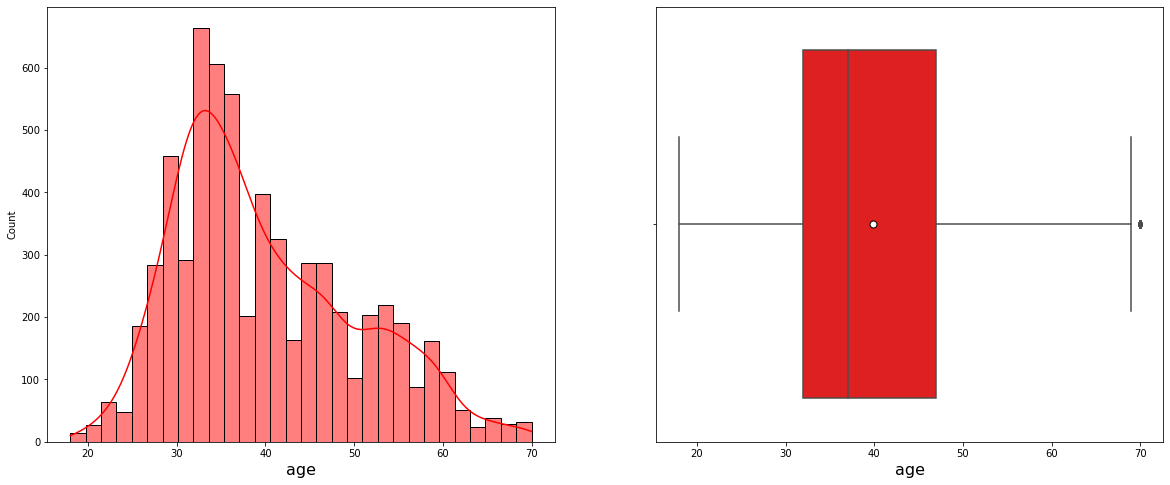

In [332]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
ax=sns.histplot(data=df, x="age",kde=True, color="red",bins=30, ax=axes[0])
ax.set_xlabel('age',fontsize=16)
ax = sns.boxplot(x=df["age"],showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"},ax=axes[1], color="red")
ax.set_xlabel('age',fontsize=16)
plt.show()

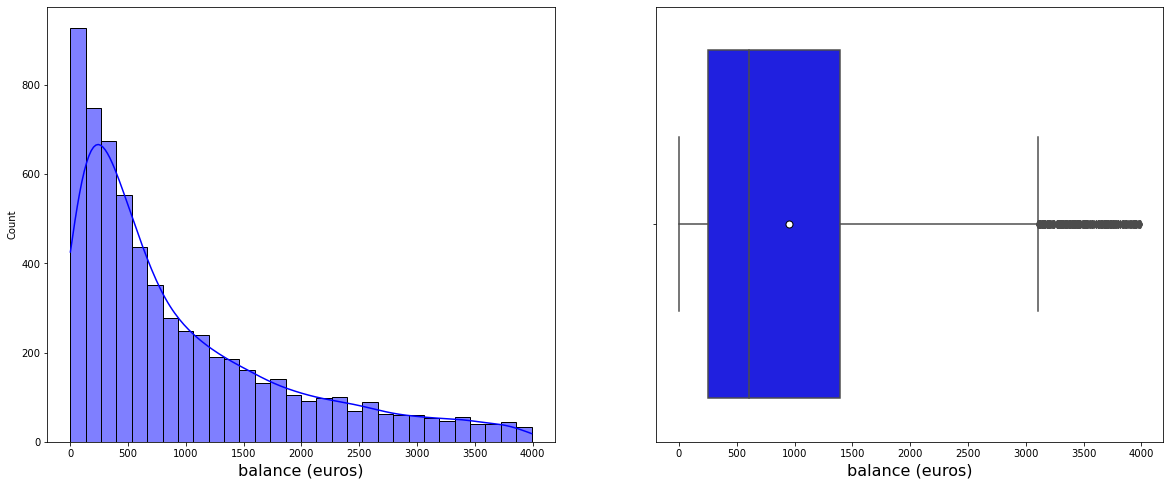

In [333]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
ax=sns.histplot(data=df, x="balance",kde=True, color="blue",bins=30, ax=axes[0])
ax.set_xlabel('balance (euros)',fontsize=16)
ax = sns.boxplot(x=df["balance"],showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"},ax=axes[1], color="blue")
ax.set_xlabel('balance (euros)',fontsize=16)
plt.show()

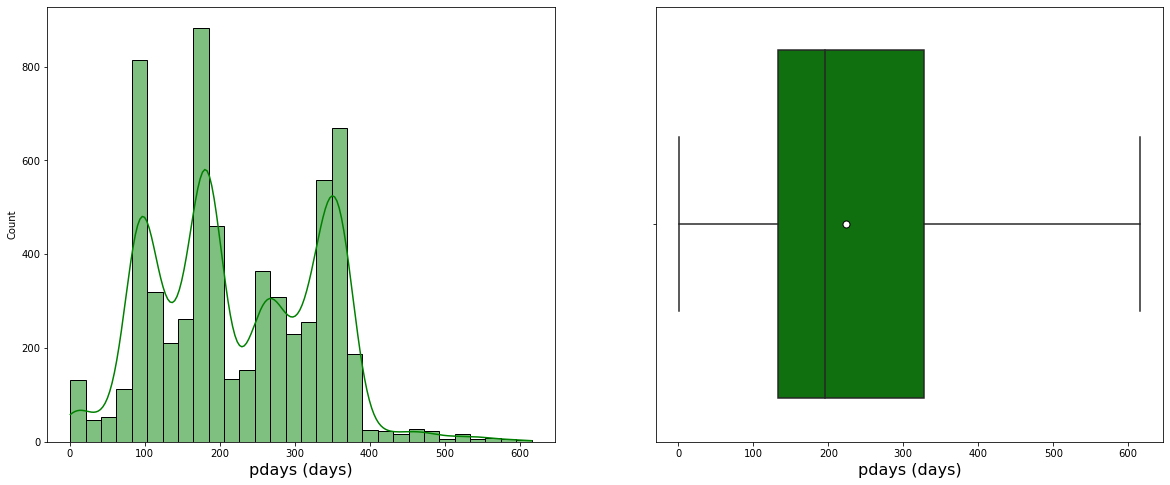

In [334]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
ax=sns.histplot(data=df, x="pdays",kde=True, color="green",bins=30, ax=axes[0])
ax.set_xlabel('pdays (days)',fontsize=16)
ax = sns.boxplot(x=df["pdays"],showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"},ax=axes[1], color="green")
ax.set_xlabel('pdays (days)',fontsize=16)
plt.show()

<h6>Final Statistics after removing outliers for columns: "price","odometer", and "year".</h6>

In [335]:
print(df['age'].describe(),df['balance'].describe(),df['pdays'].describe())

count    6316.000000
mean       39.868746
std        10.269667
min        18.000000
25%        32.000000
50%        37.000000
75%        47.000000
max        70.000000
Name: age, dtype: float64 count    6316.000000
mean      955.575047
std       939.066620
min         1.000000
25%       252.000000
50%       608.500000
75%      1393.000000
max      3990.000000
Name: balance, dtype: float64 count    6316.000000
mean      223.408011
std       108.930300
min         1.000000
25%       133.000000
50%       196.000000
75%       328.000000
max       616.000000
Name: pdays, dtype: float64


<h5 style='color:blue;font-size:18px'>dependent variable: "y", representing has the client subscribed a term deposit? (binary: 'yes','no')</h5>

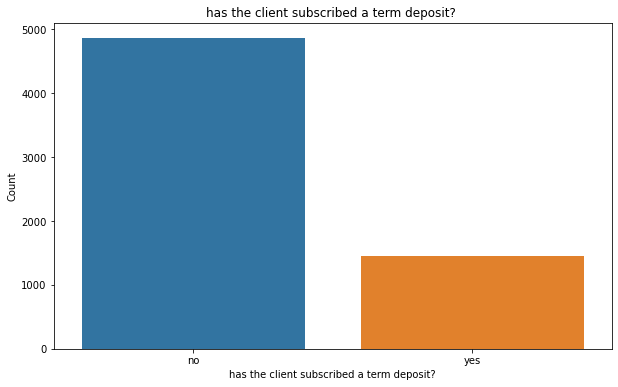

In [385]:
plt.figure(figsize=(10,6))
splot = sns.countplot(data=df, x = 'y')
splot.set_xticklabels(['no', 'yes'])
plt.xlabel('has the client subscribed a term deposit?')
plt.ylabel('Count')
plt.title('has the client subscribed a term deposit? ')
plt.show()

<h6 style='color:red;font-size:15px'>Observation:</h6>
<p> The dependent variable "y" is binary, and imbalanced, i.e., not always comfortable for machine learning model</p>

<h5 style='color:red;font-size:20px'>Visualization some independent variables vs. "balance", using as hue the dependent variable "y"</h5>

<p>Once an effective cleaning work has been completed, including removing most or all of the outliers. A boxplot "balance" vs. most of independent columns was built & analyized, indicating that in all categories: the client's age,client's job,client' marital status, client's education level, including housing's loan, personal's loan, even the  contact communication's, the clients that subscribed term deposit have more money in the their balance's account in general</p>

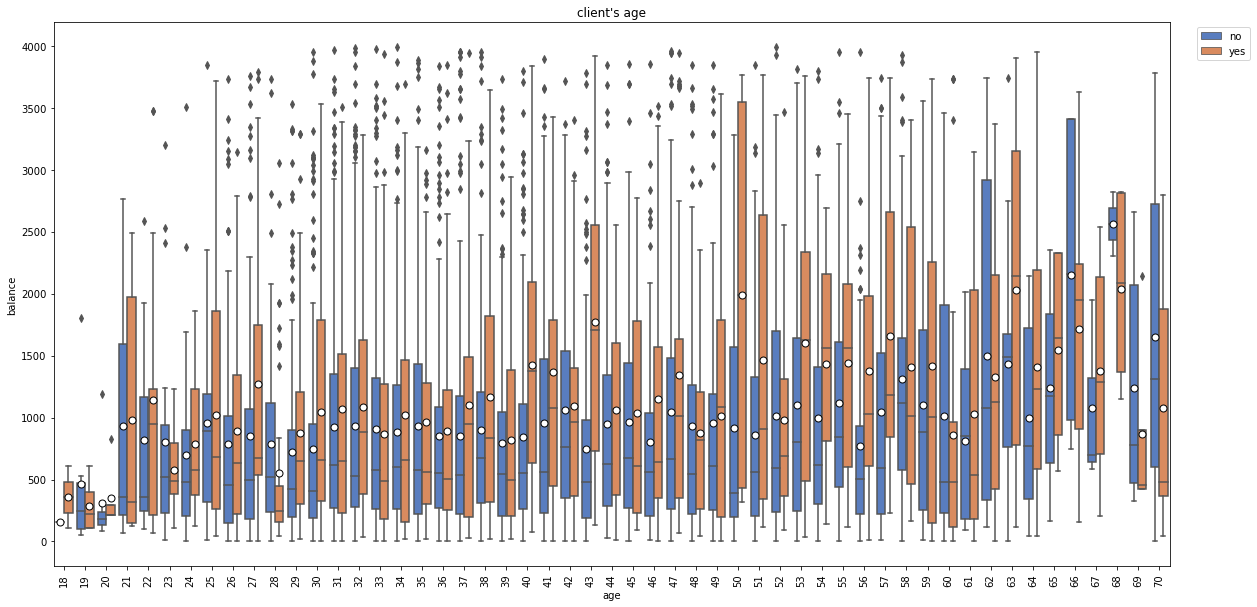

In [421]:
plt.figure(figsize=(20,10))
#plt.ylim(0,120000)
sns.boxplot(x='age', y='balance', hue="y",palette=("muted"),showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"},data=df)
plt.title("client's age")
# Set x-axis label
plt.xlabel('age')
plt.xticks(rotation = 90)
# Set y-axis label
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.ylabel('balance')
plt.show()

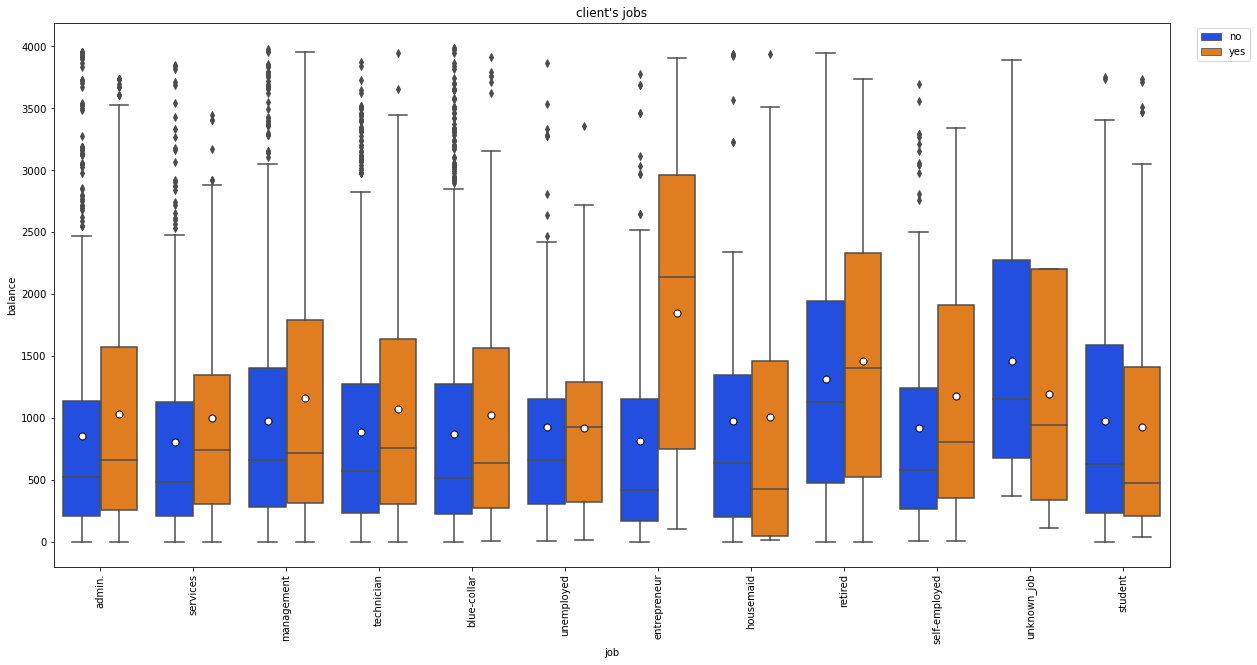

In [422]:
plt.figure(figsize=(20,10))
#plt.ylim(0,120000)
sns.boxplot(x='job', y='balance', hue="y",palette=("bright"),showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"},data=df)
plt.title("client's jobs")
# Set x-axis label
plt.xlabel('job')
# Set y-axis label
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.ylabel('balance')
plt.show()

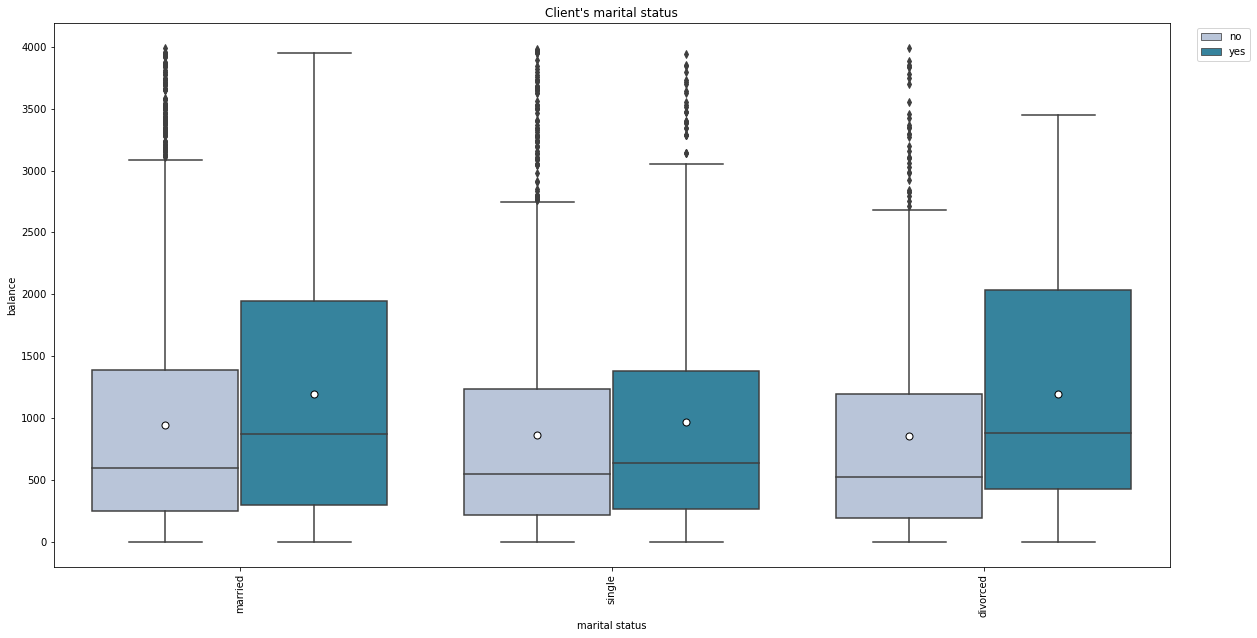

In [423]:
plt.figure(figsize=(20,10))
#plt.ylim(0,120000)
sns.boxplot(x='marital', y='balance', hue="y",palette=("PuBuGn"),showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"},data=df)
plt.title("Client's marital status")
# Set x-axis label
plt.xlabel('marital status')
# Set y-axis label
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.ylabel('balance')
plt.show()

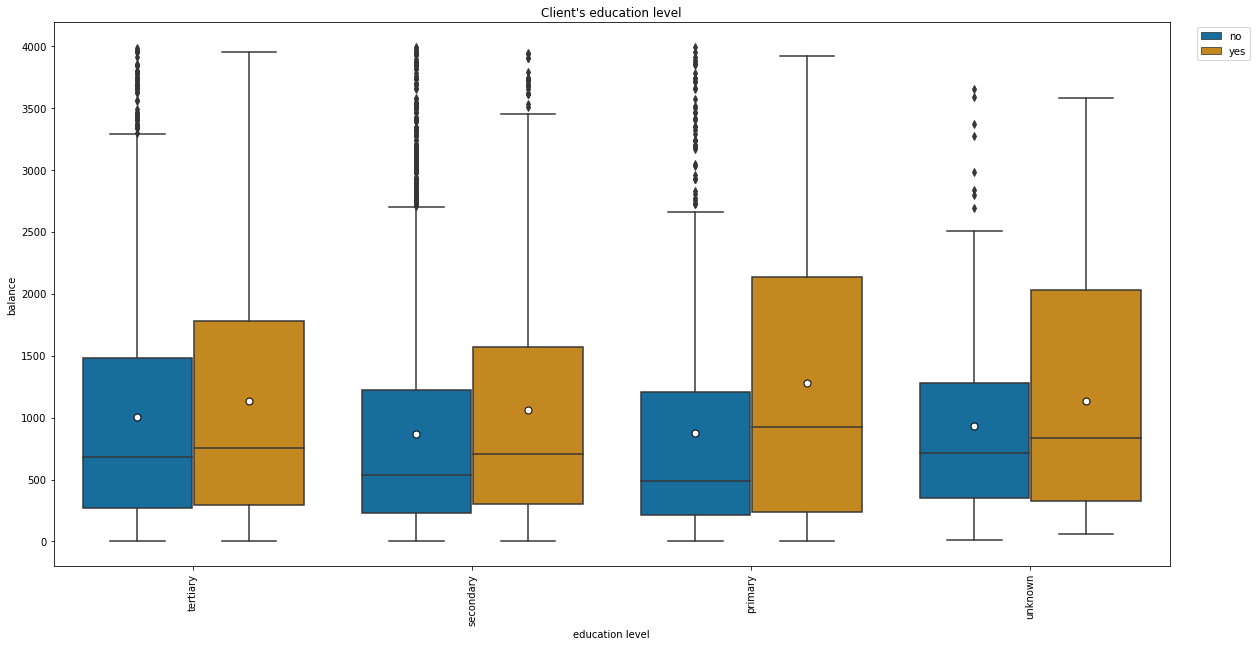

In [398]:
plt.figure(figsize=(20,10))
#plt.ylim(0,120000)
sns.boxplot(x='education', y='balance', hue="y",palette=("colorblind"),showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"},data=df)
plt.title("Client's education level")
# Set x-axis label
plt.xlabel('education level')
# Set y-axis label
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.ylabel('balance')
plt.show()

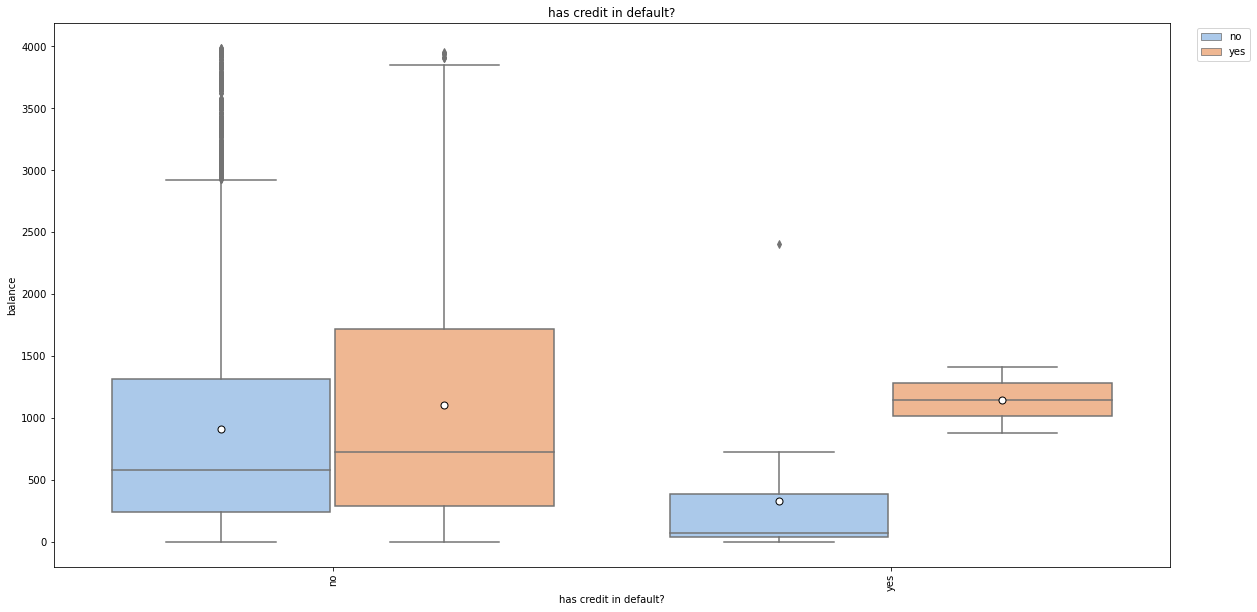

In [424]:
plt.figure(figsize=(20,10))
#plt.ylim(0,120000)
sns.boxplot(x='default', y='balance', hue="y",palette=("pastel"),showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"},data=df)
plt.title("has credit in default?")
# Set x-axis label
plt.xlabel('has credit in default?')
# Set y-axis label
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.ylabel('balance')
plt.show()

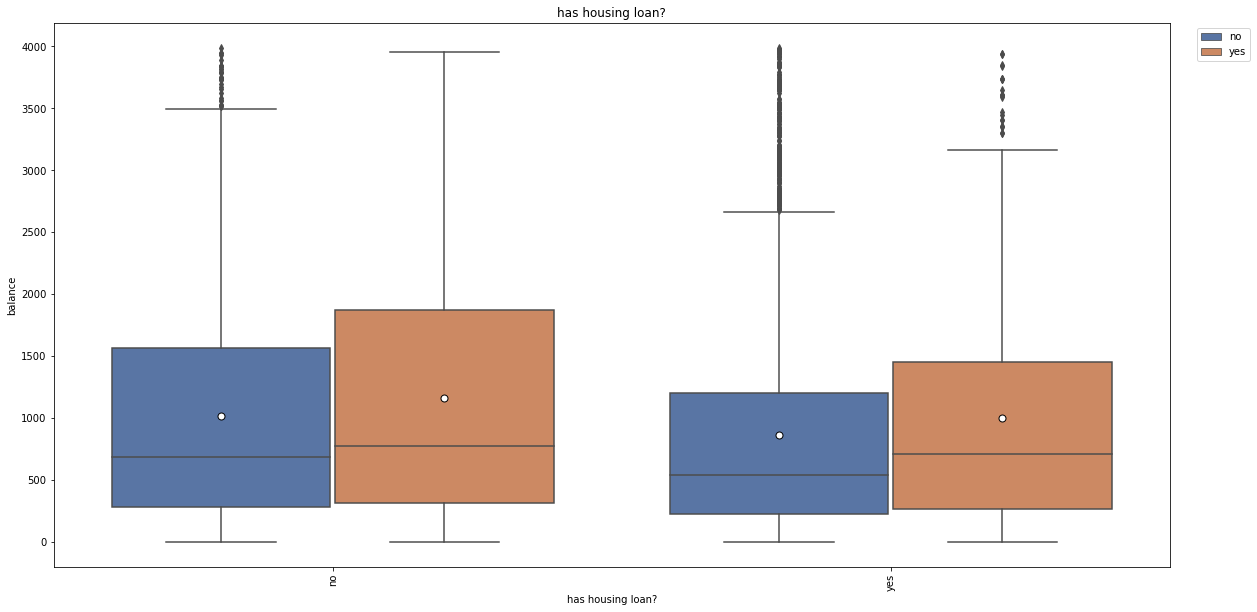

In [425]:
plt.figure(figsize=(20,10))
#plt.ylim(0,120000)
sns.boxplot(x='housing', y='balance', hue="y",palette=("deep"),showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"},data=df)
plt.title("has housing loan?")
# Set x-axis label
plt.xlabel('has housing loan?')
# Set y-axis label
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.ylabel('balance')
plt.show()

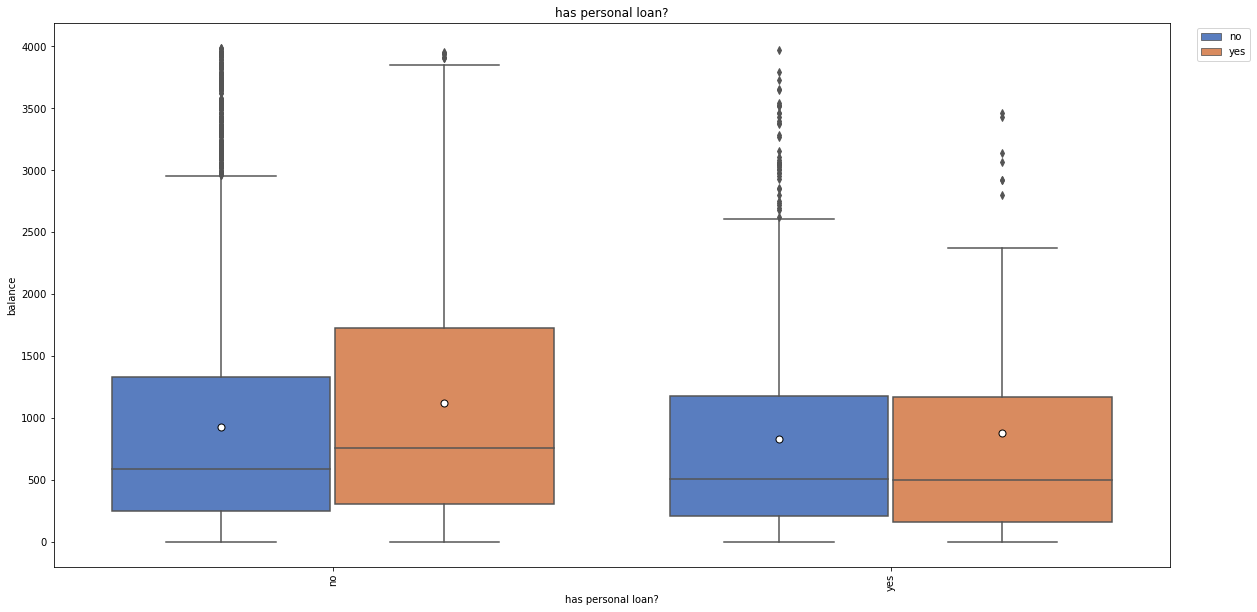

In [426]:
plt.figure(figsize=(20,10))
#plt.ylim(0,120000)
sns.boxplot(x='loan', y='balance', hue="y",palette=("muted"),showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"},data=df)
plt.title("has personal loan?")
# Set x-axis label
plt.xlabel('has personal loan?')
# Set y-axis label
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.ylabel('balance')
plt.show()

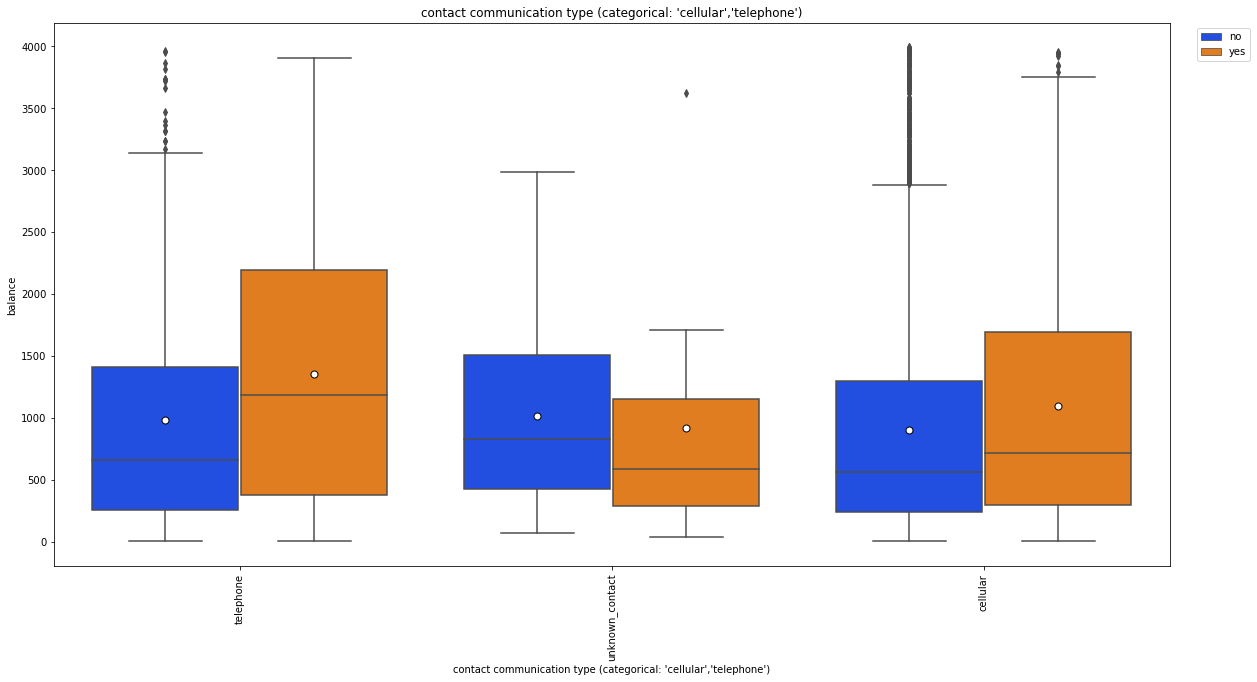

In [427]:
plt.figure(figsize=(20,10))
#plt.ylim(0,120000)
sns.boxplot(x='contact', y='balance', hue="y",palette=("bright"),showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"},data=df)
plt.title("contact communication type (categorical: 'cellular','telephone')")
# Set x-axis label
plt.xlabel("contact communication type (categorical: 'cellular','telephone')")
# Set y-axis label
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.ylabel('balance')
plt.show()

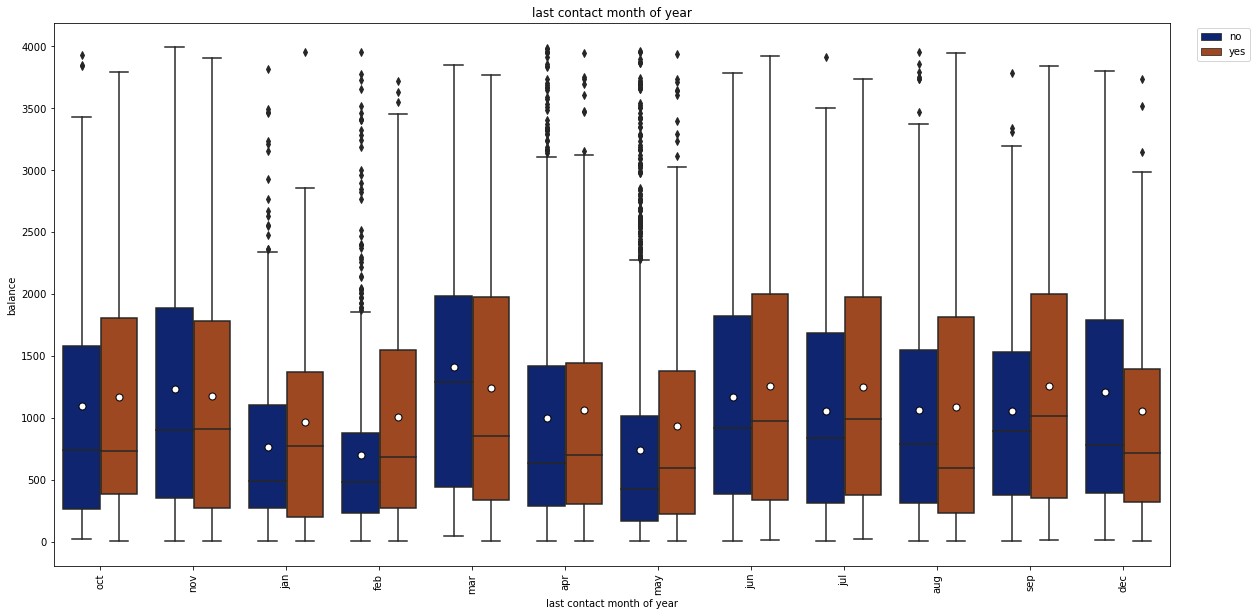

In [428]:
plt.figure(figsize=(20,10))
#plt.ylim(0,120000)
sns.boxplot(x='month', y='balance', hue="y",palette=("dark"),showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"},data=df)
plt.title("last contact month of year")
# Set x-axis label
plt.xlabel("last contact month of year")
# Set y-axis label
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.ylabel('balance')
plt.show()

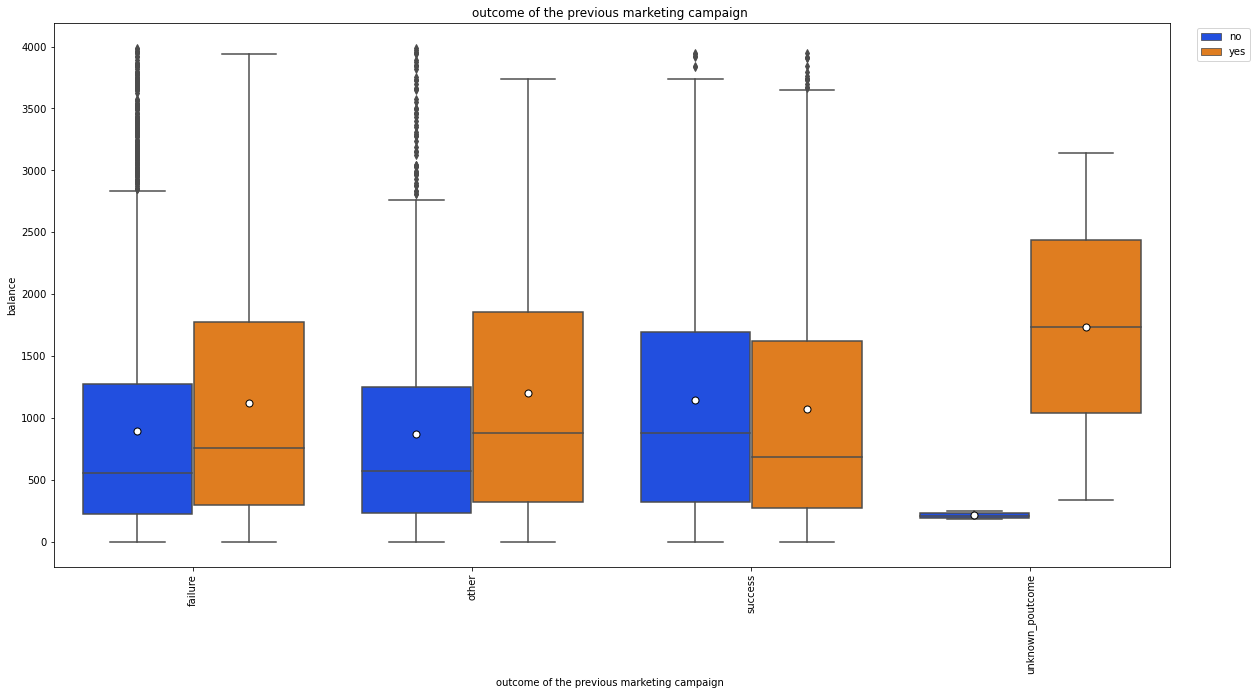

In [429]:
plt.figure(figsize=(20,10))
#plt.ylim(0,120000)
sns.boxplot(x='poutcome', y='balance', hue="y",palette=("bright"),showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"},data=df)
plt.title("outcome of the previous marketing campaign ")
# Set x-axis label
plt.xlabel("outcome of the previous marketing campaign ")
# Set y-axis label
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.ylabel('balance')
plt.show()

<h6 style='color:red;font-size:18px'>Analysis/Treatment of the Categorical Features</h6>

<h5 style="color:red;">Nominal Features:</h5><p>

<p>Nominal features are categorical features that have no numerical importance. Order does not matter. Most of the 
columns were found to fall in this category as follows: "job", "education","contact","month", "day", 
    "marital",and "poutcome". The Pandas get_dummies function was used to creates dummy variables was used to treat 
    them. A dummy variable is a numerical variable that encodes categorical information, having two possible values:
        0 or 1.</p>

In [431]:
print(df['job'].value_counts(),df['education'].value_counts(),df['contact'].value_counts(),df['month'].value_counts(),
      df['day'].value_counts(),df['marital'].value_counts(),df['poutcome'].value_counts())

management       1361
blue-collar      1268
technician       1038
admin.            876
services          546
retired           266
student           244
self-employed     224
entrepreneur      192
unemployed        165
housemaid         110
unknown_job        26
Name: job, dtype: int64 secondary            3329
tertiary             2011
primary               735
unknown_education     241
Name: education, dtype: int64 cellular           5843
telephone           431
unknown_contact      42
Name: contact, dtype: int64 may    1902
apr     896
nov     839
feb     734
aug     418
jan     398
jun     256
oct     244
sep     220
jul     185
mar     132
dec      92
Name: month, dtype: int64 18    394
15    358
17    358
13    336
20    331
12    314
14    290
4     285
5     281
6     258
2     257
7     255
11    251
8     241
29    224
21    213
30    203
3     191
16    185
19    169
9     151
28    139
26    101
25     89
22     86
1      86
10     82
27     80
24     45
23     41
31     2

In [586]:
job_encoded=pd.get_dummies(df['job'])
education_encoded=pd.get_dummies(df['education'])
contact_encoded=pd.get_dummies(df['contact'])
month_encoded=pd.get_dummies(df['month'])
day_encoded=pd.get_dummies(df['day'])
marital_encoded=pd.get_dummies(df['marital'])
poutcome_encoded=pd.get_dummies(df['poutcome'])
df1=pd.concat([df,job_encoded,education_encoded,contact_encoded,month_encoded,day_encoded,marital_encoded,
               poutcome_encoded],axis=1)

<h6 style="color:red;">Binary data:</h6><p>

<p>Binary data is also nominal data, meaning they represent qualitatively different values that cannot be compared 
numerically.There were three independent variables considered as binary: 'default'
        'housing', ;'loan' all of them with 'yes' and 'no'</p>

In [587]:
ohe_transformer = make_column_transformer((OneHotEncoder(drop = 'if_binary'), ['default','housing','loan']),
                                          remainder='passthrough')

<h5 style="color:red;">Ordinal Features:</h5><p>
None of the independent variables were considered to be treated as a ordinal
    feature, not even poutcome, since there were a bunch of 'unknown' and 'other' items listed, beside 'failure' and 
    'success'</p>

<h5>Since, most of the columns have values (0 or 1), it was decided to scale the column: "balance"as follow:</h5>

In [588]:
df1['balance']=df1['balance'].div(100)

<h6 style='color:blue;font-size:18px'>Splitting the variables</h6>

In [589]:
X=df1.drop(['job','education','duration','contact','month','day','marital','poutcome','y'], axis = 1)
y = df1['y']

In [590]:
X_train, X_test, y_train, y_test = train_test_split( X, y,random_state = 42,stratify = y)

In [571]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5304 entries, 24060 to 45201
Data columns (total 77 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                5304 non-null   int64  
 1   default            5304 non-null   object 
 2   balance            5304 non-null   float64
 3   housing            5304 non-null   object 
 4   loan               5304 non-null   object 
 5   campaign           5304 non-null   int64  
 6   pdays              5304 non-null   int64  
 7   previous           5304 non-null   int64  
 8   admin.             5304 non-null   uint8  
 9   blue-collar        5304 non-null   uint8  
 10  entrepreneur       5304 non-null   uint8  
 11  housemaid          5304 non-null   uint8  
 12  management         5304 non-null   uint8  
 13  retired            5304 non-null   uint8  
 14  self-employed      5304 non-null   uint8  
 15  services           5304 non-null   uint8  
 16  student            

<h5> Histogram of the independent variables</h5>

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'balance'}>,
        <AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>,
        <AxesSubplot:title={'center':'previous'}>,
        <AxesSubplot:title={'center':'admin.'}>,
        <AxesSubplot:title={'center':'blue-collar'}>,
        <AxesSubplot:title={'center':'entrepreneur'}>,
        <AxesSubplot:title={'center':'housemaid'}>],
       [<AxesSubplot:title={'center':'management'}>,
        <AxesSubplot:title={'center':'retired'}>,
        <AxesSubplot:title={'center':'self-employed'}>,
        <AxesSubplot:title={'center':'services'}>,
        <AxesSubplot:title={'center':'student'}>,
        <AxesSubplot:title={'center':'technician'}>,
        <AxesSubplot:title={'center':'unemployed'}>,
        <AxesSubplot:title={'center':'unknown_job'}>,
        <AxesSubplot:title={'center':'primary'}>],
       [<AxesSubplot:title={'center':'secondary'}>,
        <AxesSubplot

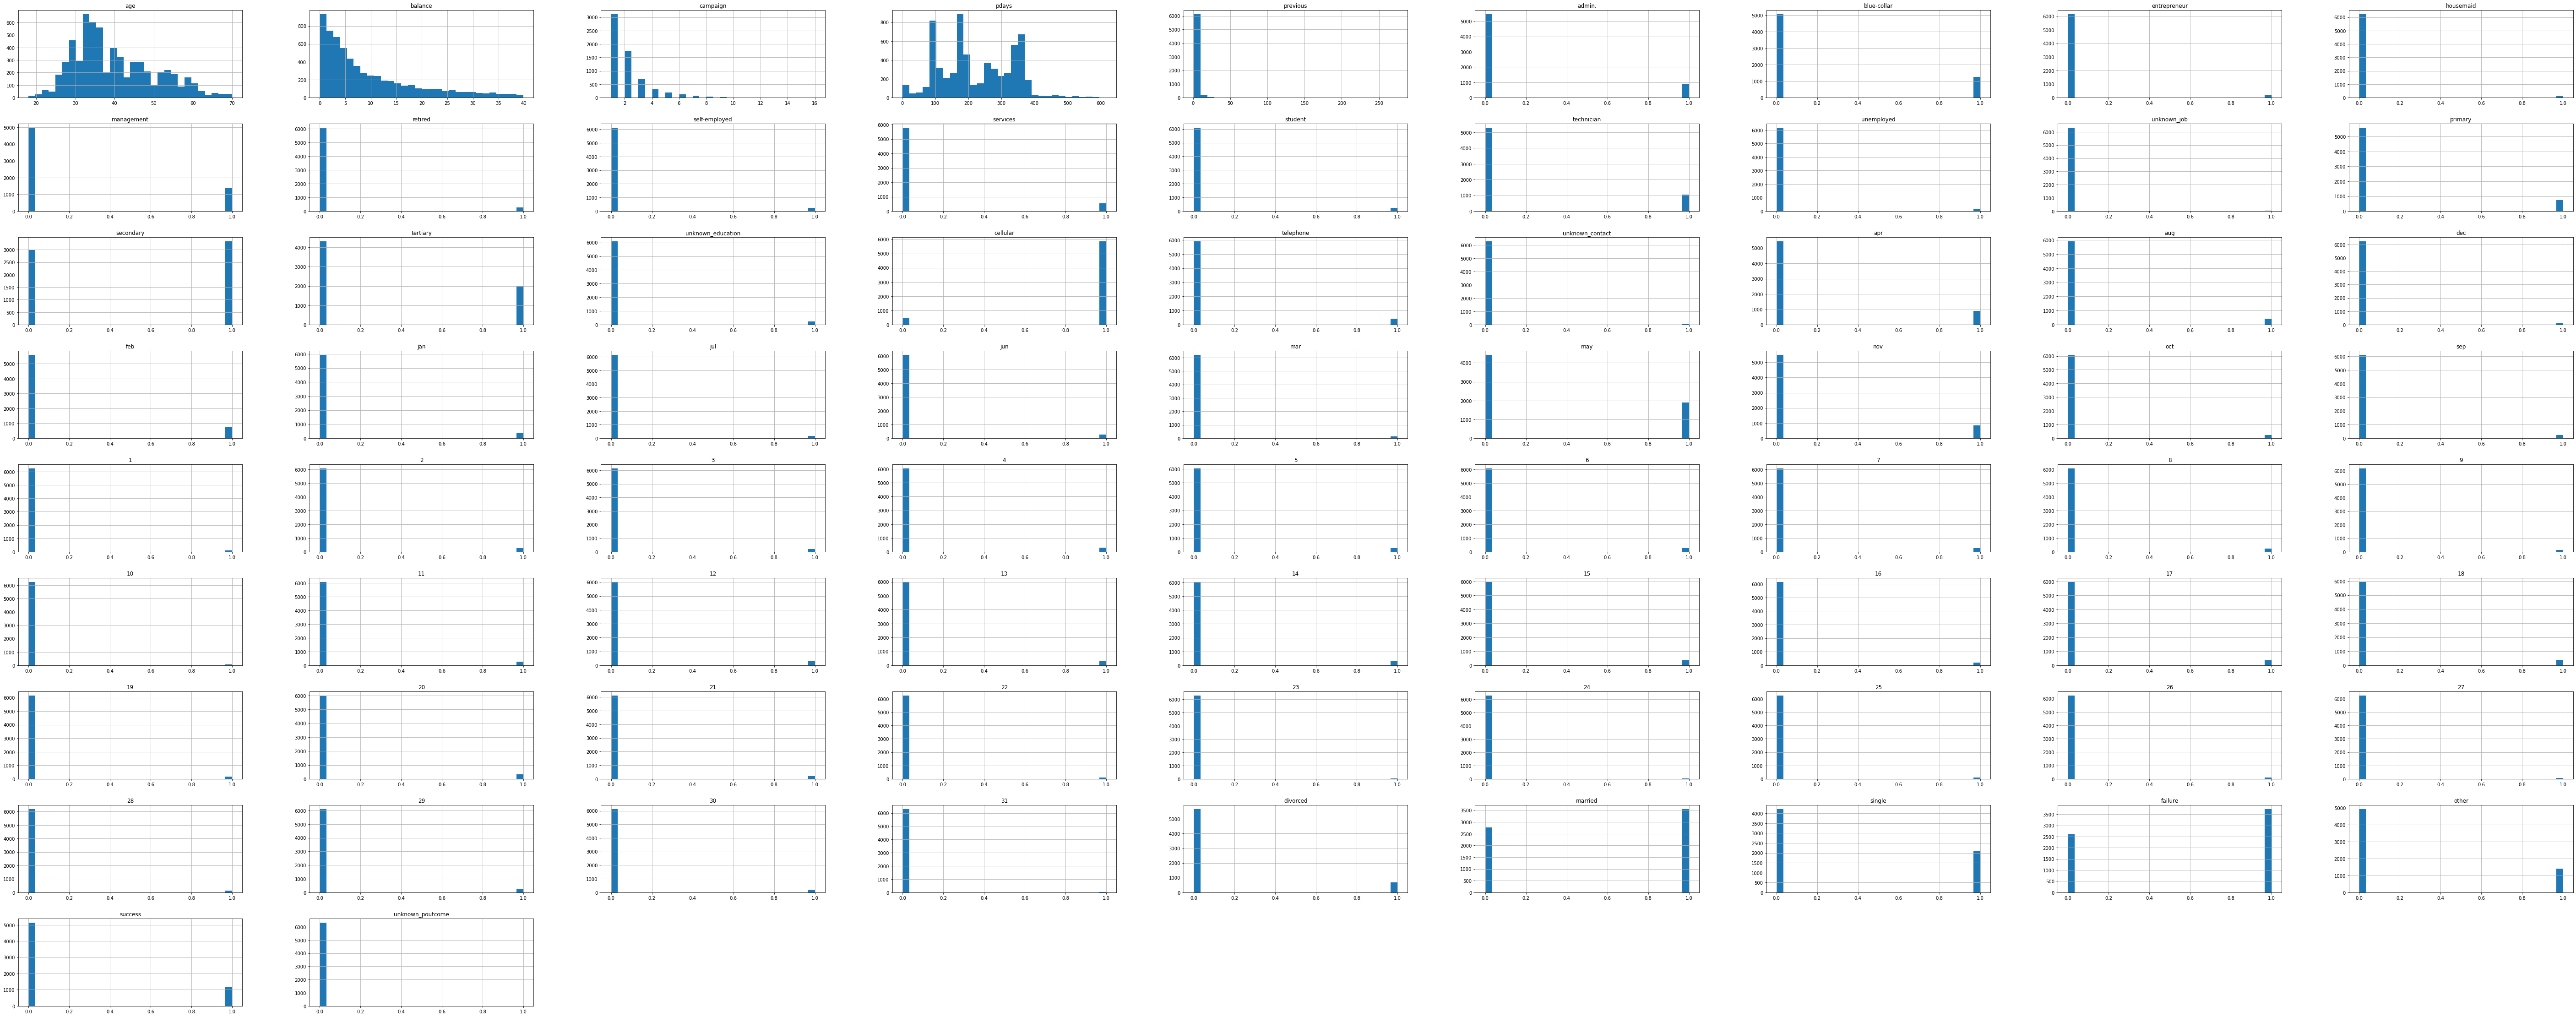

In [591]:
X.hist(bins=30, figsize=(100, 40))

<h4 style='color:red;font-size:18px'>Modelling</h4>
<p>Although, working with imbalance data is always a challenge for any particular Machine Learning Model, four models
were considered for the analysis: KNN, Logistic Regression, Support Machine Vector, and Decision Tree. 
The metric used to estimate the optimum parameters for each model was 'roc_auc', since it works quite well for 
imbalance data</p>

<h6 style='color:blue;font-size:18px'>KNeighborsClassifier</h6>

In [516]:
pipeline_knn=Pipeline([('transformer', ohe_transformer),('scale', StandardScaler()), ('knn', KNeighborsClassifier())])
pipeline_knn

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['default', 'housing',
                                                   'loan'])])),
                ('scale', StandardScaler()), ('knn', KNeighborsClassifier())])

<h6>Hyperparameters being tested</h6>

In [517]:
param2_knn={'knn__n_neighbors':np.array(range(1,21,2)),'knn__weights' : ['uniform', 'distance'],'knn__p':[1,2]}

In [592]:
precision_preds_grid_knn=GridSearchCV(pipeline_knn, param_grid=param2_knn,scoring='roc_auc',cv = 5)
precision_preds_grid_knn.fit(X_train,y_train)


best_score_test_knn=precision_preds_grid_knn.score(X_test,y_test)
best_score_train_knn=precision_preds_grid_knn.score(X_train,y_train)
best_params_precision_preds_knn=precision_preds_grid_knn.best_params_


print(f'roc_auc train: {best_score_train_knn: .3f}',f'roc_auc test: {best_score_test_knn: .3f}')
print("Tuned Hyperparameters KNearestNeighborsClassifier:", best_params_precision_preds_knn)

n_splits_knn  = precision_preds_grid_knn.n_splits_ 
n_iter_knn = pd.DataFrame(precision_preds_grid_knn.cv_results_).shape[0]
mean_time_knn=np.mean(precision_preds_grid_knn.cv_results_['mean_fit_time'])
print(f'Elapsed Time using GridSearchCV: {mean_time_knn * n_splits_knn * n_iter_knn: .3f}')

roc_auc train:  1.000 roc_auc test:  0.852
Tuned Hyperparameters KNearestNeighborsClassifier: {'knn__n_neighbors': 19, 'knn__p': 1, 'knn__weights': 'distance'}
Elapsed Time using GridSearchCV:  4.287


<h6 style='color:blue;font-size:18px'>Logistic Regression</h6>

In [519]:
pipeline_lgr=Pipeline([('transformer', ohe_transformer),('scale', StandardScaler()), 
                       ('log', LogisticRegression(random_state=42, class_weight='w'))])
pipeline_lgr

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['default', 'housing',
                                                   'loan'])])),
                ('scale', StandardScaler()),
                ('log', LogisticRegression(class_weight='w', random_state=42))])

<h6>Hyperparameters being tested</h6>

In [520]:
param2_lgr = {'log__penalty' : ['l1','l2'],'log__C': np.logspace(-3,3,7),
              'log__solver': ['newton-cg', 'lbfgs', 'liblinear']}

In [593]:
pipeline_lgr=Pipeline([('transformer', ohe_transformer),('scale', StandardScaler()), ('log', LogisticRegression(random_state=42, class_weight='w'))])
precision_preds_grid_lgr=GridSearchCV(pipeline_lgr, param_grid=param2_lgr,scoring='roc_auc',cv = 5)
precision_preds_grid_lgr.fit(X_train,y_train)


best_score_test_lgr=precision_preds_grid_lgr.score(X_test,y_test)
best_score_train_lgr=precision_preds_grid_lgr.score(X_train,y_train)
best_params_precision_preds_lgr=precision_preds_grid_lgr.best_params_

print(f'roc_auc train: {best_score_train_lgr: .3f}',f'roc_auc test: {best_score_test_lgr: .3f}')
print("Tuned Hyperparameters Logistic Regression :", best_params_precision_preds_lgr)

n_splits_lgr  = precision_preds_grid_lgr.n_splits_ 
n_iter_lgr = pd.DataFrame(precision_preds_grid_lgr.cv_results_).shape[0]
mean_time_lgr=np.mean(precision_preds_grid_lgr.cv_results_['mean_fit_time'])
print(f'Elapsed Time using GridSearchCV: {mean_time_lgr* n_splits_lgr * n_iter_lgr: .3f}')

roc_auc train:  0.853 roc_auc test:  0.863
Tuned Hyperparameters Logistic Regression : {'log__C': 0.01, 'log__penalty': 'l2', 'log__solver': 'newton-cg'}
Elapsed Time using GridSearchCV:  6.342


<h6 style='color:blue;font-size:18px'>Support Vector Machine</h6>

In [522]:
pipeline_svc=Pipeline(steps=[('transformer', ohe_transformer),('scale', StandardScaler()),
                             ('svc', SVC(probability=True))])
pipeline_svc

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['default', 'housing',
                                                   'loan'])])),
                ('scale', StandardScaler()), ('svc', SVC(probability=True))])

<h6>Hyperparameters being tested</h6>

In [523]:
param2_svc = {'svc__kernel': ['rbf', 'poly', 'linear','sigmoid'],'svc__gamma': [0.001,0.1, 1.0,10]}

In [594]:
pipeline_svc=Pipeline(steps=[('transformer', ohe_transformer),('scale', StandardScaler()),('svc', SVC(probability=True))])
precision_preds_grid_svc=GridSearchCV(pipeline_svc, param_grid=param2_svc,scoring='roc_auc',cv=5)
precision_preds_grid_svc.fit(X_train,y_train)


best_score_test_svc=precision_preds_grid_svc.score(X_test,y_test)
best_score_train_svc=precision_preds_grid_svc.score(X_train,y_train)
best_params_precision_preds_svc=precision_preds_grid_svc.best_params_

print(f'roc_auc train: {best_score_train_svc: .3f}',f'roc_auc test: {best_score_test_svc: .3f}')
print("Tuned Hyperparameters SVC :", best_params_precision_preds_svc)

n_splits_svc  = precision_preds_grid_svc.n_splits_ 
n_iter_svc = pd.DataFrame(precision_preds_grid_svc.cv_results_).shape[0]
mean_time_svc=np.mean(precision_preds_grid_svc.cv_results_['mean_fit_time'])
print(f'Elapsed Time using GridSearchCV: {mean_time_svc * n_splits_svc * n_iter_svc: .3f}')

roc_auc train:  0.871 roc_auc test:  0.847
Tuned Hyperparameters SVC : {'svc__gamma': 0.001, 'svc__kernel': 'rbf'}
Elapsed Time using GridSearchCV:  423.447


<h6 style='color:blue;font-size:18px'>Decision Tree</h6>

In [525]:
pipeline_tree=Pipeline(steps=[('transformer', ohe_transformer),('scale', StandardScaler()),
                              ('tree', DecisionTreeClassifier(random_state=42))])
pipeline_tree

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['default', 'housing',
                                                   'loan'])])),
                ('scale', StandardScaler()),
                ('tree', DecisionTreeClassifier(random_state=42))])

<h6>Hyperparameters being tested</h6>

In [526]:
param2_tree = {'tree__max_depth': [i for i in range(1, 10)],'tree__min_samples_split': [0.01,0.05,0.1, 0.2, 0.25],
               'tree__criterion': ['gini', 'entropy','log_loss'],'tree__min_samples_leaf': [i for i in range(1, 6)]}

In [595]:
tree_grid = GridSearchCV(pipeline_tree, param_grid=param2_tree,scoring='roc_auc',cv=5)
tree_grid.fit(X_train, y_train)


best_score_test_tree=tree_grid.score(X_test,y_test)
best_score_train_tree=tree_grid.score(X_train,y_train)
best_params_precision_preds_tree=tree_grid.best_params_

print(f'roc_auc train: {best_score_train_svc: .3f}',f'roc_auc test: {best_score_test_svc: .3f}')
print("Tuned Hyperparameters Decision Tree :", best_params_precision_preds_tree)

n_splits_tree  = tree_grid.n_splits_ 
n_iter_tree = pd.DataFrame(tree_grid.cv_results_).shape[0]
mean_time_tree=np.mean(tree_grid.cv_results_['mean_fit_time'])
print(f'Elapsed Time using GridSearchCV: {mean_time_tree * n_splits_tree * n_iter_tree: .3f}')

roc_auc train:  0.871 roc_auc test:  0.847
Tuned Hyperparameters Decision Tree : {'tree__criterion': 'gini', 'tree__max_depth': 9, 'tree__min_samples_leaf': 5, 'tree__min_samples_split': 0.05}
Elapsed Time using GridSearchCV:  93.143


<h3 style="color:red;">Evaluation</h3>

<h4>Ranking Regression Models built by comparing their metrics</h4>

In [598]:
namedIndex = pd.Series(['KNN','Logistic Regression','SVC','Decision Tree'], name='Model')

df_results = pd.DataFrame({'train_score': [best_score_train_knn,best_score_train_lgr,best_score_train_svc,best_score_train_tree],
        'test_score': [best_score_test_knn,best_score_test_lgr,best_score_test_svc,best_score_test_tree], 
        'average fit time':[mean_time_knn*n_splits_knn * n_iter_knn,mean_time_lgr*n_splits_lgr * n_iter_lgr,mean_time_svc*n_splits_svc * n_iter_svc,mean_time_tree * n_splits_tree * n_iter_tree]},
        index=namedIndex)

df_results.head()

,train_score,test_score,average fit time
Model,,,
KNN,1.000000,0.852293,4.287323
Logistic Regression,0.852786,0.863445,6.342066
SVC,0.870855,0.847407,423.447216
Decision Tree,0.835165,0.825754,93.143157


<h6 style='color:blue;font-size:18px'>Confusion Matrix & Precision , and Recall scores</h6>

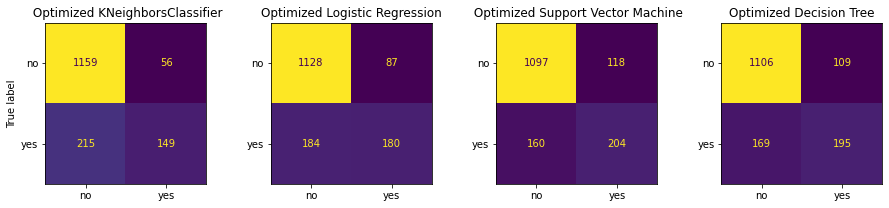

In [596]:
pred_knn=precision_preds_grid_knn.predict(X_test)
pred_lgr=precision_preds_grid_lgr.predict(X_test)
pred_svc=precision_preds_grid_svc.predict(X_test)
pred_tree=tree_grid.predict(X_test)
f, axes = plt.subplots(1, 4, figsize=(15, 5))
preds=[pred_knn,pred_lgr,pred_svc,pred_tree]
title_pred=[' Optimized KNeighborsClassifier','Optimized Logistic Regression',
            ' Optimized Support Vector Machine', 'Optimized Decision Tree']

for i in range(0,len(preds)):
    cf_matrix = confusion_matrix(y_test, preds[i],labels=precision_preds_grid_knn.classes_)
    disp = ConfusionMatrixDisplay(cf_matrix,
                                  display_labels = ['no', 'yes'])
    disp.plot(ax=axes[i], xticks_rotation=0)
    disp.ax_.set_title(title_pred[i])
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')

plt.subplots_adjust(wspace=0.40, hspace=0.1)

In [600]:
namedIndex = pd.Series(['KNN','Logistic Regression','SVC','Decision Tree'], name='Model')

df_results_2 = pd.DataFrame({'score_precision': ['73%','67%','63%','64%'],
        'score_recall': ['41%','49%','56%','54%']},
        index=namedIndex)

df_results_2.head()

,score_precision,score_recall
Model,,
KNN,73%,41%
Logistic Regression,67%,49%
SVC,63%,56%
Decision Tree,64%,54%


<h6 style='color:blue;font-size:18px'>Precision-Recal Curve</h6>
<p> This type of curve works much better for moderate to large imbalanced data than the ROC-curve. This curve 
indicates that the best model is Logistic Regression model (red line) by slighlty margin over KNN model(purple lines).
It also indicates that the worst model seems to be the Decision Tree</p>

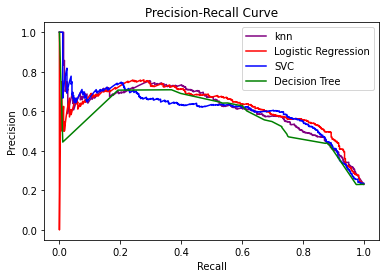

In [597]:
y_score_knn = precision_preds_grid_knn.predict_proba(X_test)[:, 1]
y_score_lgr = precision_preds_grid_lgr.predict_proba(X_test)[:, 1]
y_score_svc = precision_preds_grid_svc.predict_proba(X_test)[:, 1]
y_score_tree = tree_grid.predict_proba(X_test)[:, 1]
precision_knn, recall_knn, thresholds_knn = precision_recall_curve(y_test, y_score_knn,pos_label="yes")
precision_lgr, recall_lgr, thresholds_lgr = precision_recall_curve(y_test, y_score_lgr,pos_label="yes")
precision_svc, recall_svc, thresholds_svc = precision_recall_curve(y_test, y_score_svc,pos_label="yes")
precision_tree, recall_tree, thresholds_tree = precision_recall_curve(y_test, y_score_tree,pos_label="yes")
fig, ax = plt.subplots()
ax.plot(recall_knn, precision_knn, color='purple',label='knn')
ax.plot(recall_lgr, precision_lgr, color='red',label='Logistic Regression')
ax.plot(recall_svc, precision_svc, color='blue',label='SVC')
ax.plot(recall_tree, precision_tree, color='green',label='Decision Tree')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.legend(loc='best')

#display plot
plt.show()

<h2 style="color:red;">Main Conclusions & Recomendations<h2>

<p>1. The final dataset, after cleaning, removing outliers, converting the categoricals data in 0 and 1 values,etc consists of 77 columns and 6316 rows. The target columns was "y" which stands: if a future client will subscribe a term deposit or not.</p>

<p>2. Overall, the best classification model is the Logistic Regression model for classifying the dataset analyzed in this study, however the other three models are fairly decent, in particular  Decision Tree models, and KNeighborsClassifier.</p>

<p>3.It is important to highlight that the numerical variable "balance" was divided by 100, before initiating the regression modeling, since the majority of the columns have values 0 and 1. This helped to improved the metrics.</p>

<p>4.There were five numerical independent variables used: 'age','balance','duration','previous','campaign','pdays', since "duration" was only for benchmark purposes and was discarded for realistic predictive modelling,the rest were nominals that were converted to values 0 and 1. Therefore, most of the independent variables used in the modelling phase have values 0 and 1.</p>

<p>5.The metric used to estimate the optimum parameters for each model was 'roc_auc' (the area under the ROC curve), since it works quite well for imbalance data</p>


<p>6.The precision- recall curve was chosen also as a indicator, since works much better for moderate to large imbalanced data than the ROC-curve, which is the case for the dataset used in this analysis.</p>

<p>7.All categories: the client's age,client's job,client' marital status, client's education level, including housing's loan, personal's loan, even the contact communication's, the clients that subscribed term deposit have more money in the their balance's account in general.</p>